### 1. Import the necessary libs

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from prophet import Prophet
import sys
import os

### 2. Load the dataframes one by one

In [ ]:
path_of_files = r"C:\Users\yusuf\OneDrive\Desktop\Forex Project\processed"

def load_dataFrames():
    csv_files = [file for file in os.listdir(path_of_files) if file.endswith(".csv") and os.path.isfile(os.path.join(path_of_files, file))]
    ## from the previous data preperation part we have seen that pyspark is actually not a good idea to use when we have pandas so I will directly take them as pandas DataFrames.
    pd_dfs = {}
    for file in csv_files:
        file_path = os.path.join(path_of_files, file)
        file_name = os.path.splitext(file)[0]
        pd_dfs[file_name] = pd.read_csv(file_path)
    return pd_dfs
pd_dfs = load_dataFrames()

{'EURUSD_M1_processed':                       Time     Open     High      Low    Close  Volume  \
 0      2024-12-12 16:52:00  1.05100  1.05101  1.05070  1.05101     300   
 1      2024-12-12 17:46:00  1.04990  1.05025  1.04990  1.05024     223   
 2      2024-12-12 18:07:00  1.04933  1.04956  1.04930  1.04946     300   
 3      2024-12-12 20:58:00  1.04667  1.04668  1.04663  1.04666     108   
 4      2024-12-12 22:20:00  1.04692  1.04692  1.04691  1.04691       9   
 ...                    ...      ...      ...      ...      ...     ...   
 77568  2025-03-04 06:17:00  1.04820  1.04828  1.04819  1.04828      52   
 77569  2025-03-04 20:24:00  1.06225  1.06236  1.06216  1.06229     161   
 77570  2025-03-04 21:51:00  1.06211  1.06212  1.06199  1.06210     117   
 77571  2025-03-05 03:09:00  1.06040  1.06050  1.06036  1.06042     122   
 77572  2025-03-05 06:30:00  1.06265  1.06272  1.06256  1.06267     155   
 
             MA5      MA20  MA20_std  BB_upper  ...  Daily_Range  \
 0     

### 3. Run the base prophet model to try the model

Fitting Prophet model for EURUSD_M1_processed...


15:30:47 - cmdstanpy - INFO - Chain [1] start processing
15:32:27 - cmdstanpy - INFO - Chain [1] done processing


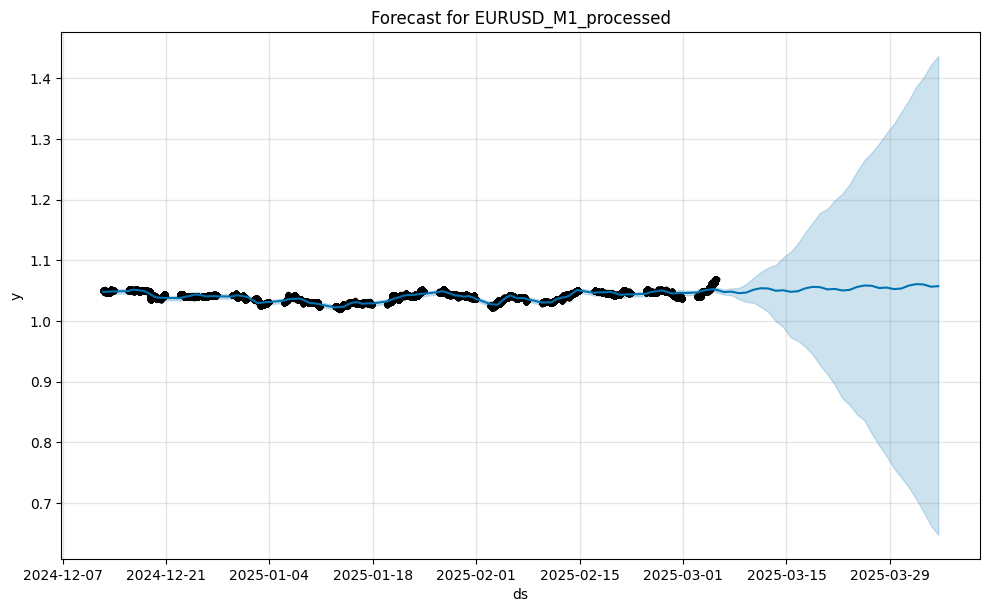

Fitting Prophet model for GBPUSD_M1_processed...


15:32:48 - cmdstanpy - INFO - Chain [1] start processing
15:34:43 - cmdstanpy - INFO - Chain [1] done processing


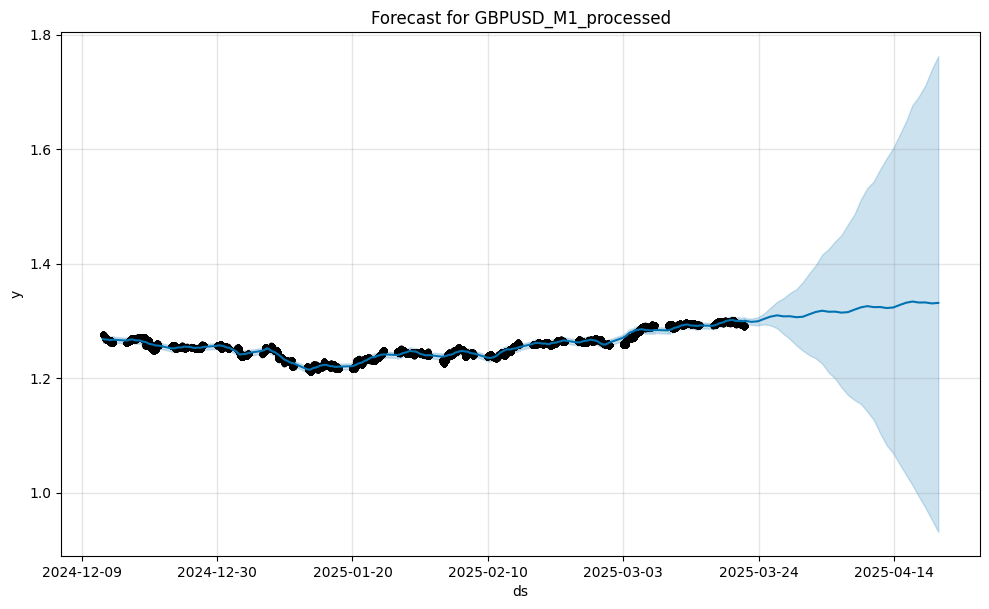

Fitting Prophet model for USDCAD_M1_processed...


15:35:06 - cmdstanpy - INFO - Chain [1] start processing
15:36:31 - cmdstanpy - INFO - Chain [1] done processing


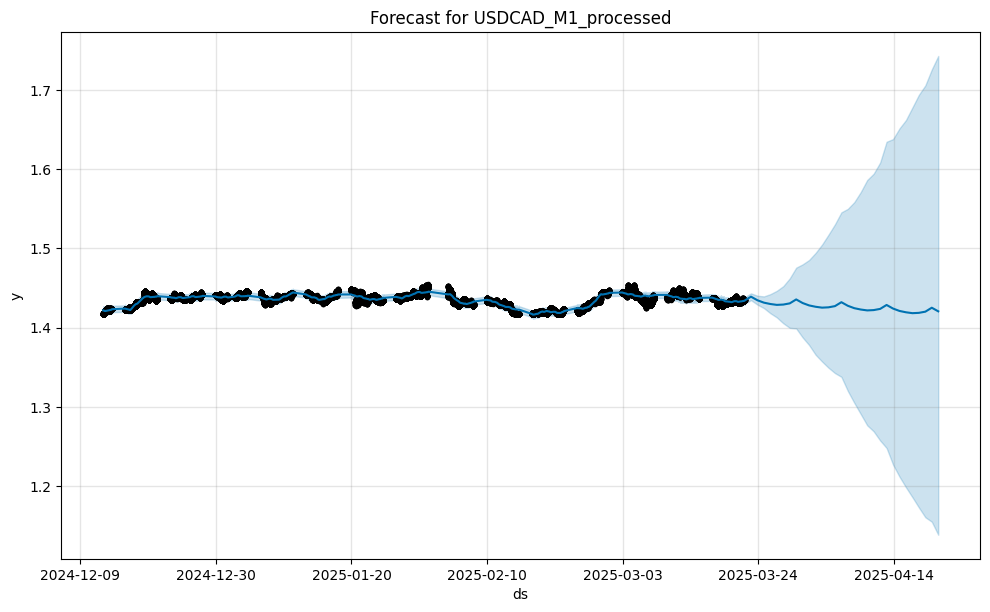

Fitting Prophet model for USDCHF_M1_processed...


15:36:51 - cmdstanpy - INFO - Chain [1] start processing
15:39:29 - cmdstanpy - INFO - Chain [1] done processing


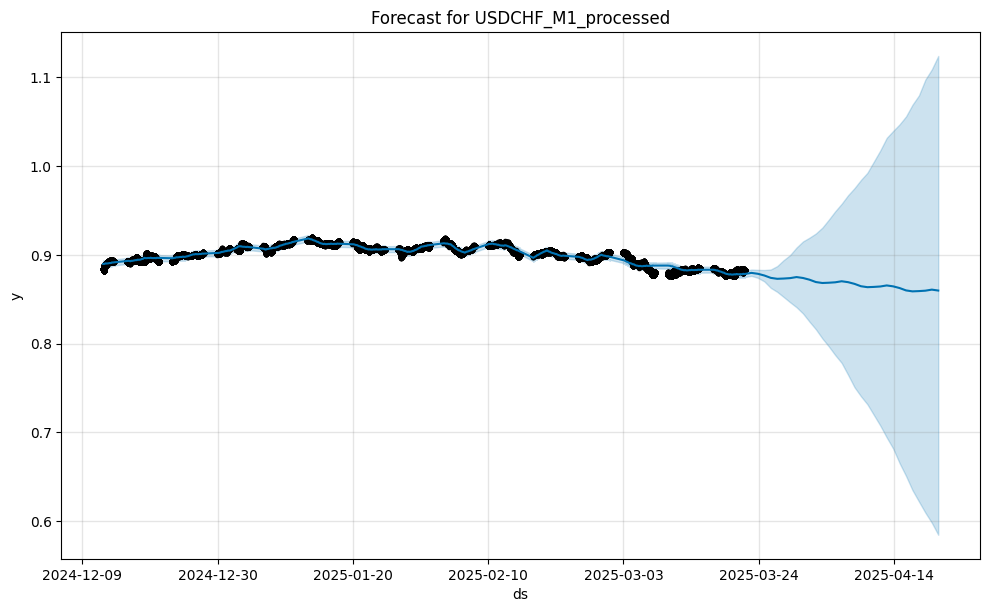

In [9]:
# we will first try the very beginner prophet model with close as the y and date as the ds parameter.

for name, file in pd_dfs.items():
    if 'Time' in file.columns:
        df_prophet = pd.DataFrame({
            'ds': pd.to_datetime(file["Time"]),
            'y': file["Close"]
        })

        print(f"Fitting Prophet model for {name}...")
        model = Prophet()
        model.fit(df_prophet)

        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)
        
        fig = model.plot(forecast)
        plt.title(f"Forecast for {name}")
        plt.show()
    else:
        print(f"Error: No date column found in {name} dataset")

### 4. Expand the model with regressors

In [11]:
pd_dfs

{'EURUSD_M1_processed':                       Time     Open     High      Low    Close  Volume  \
 0      2024-12-12 16:52:00  1.05100  1.05101  1.05070  1.05101     300   
 1      2024-12-12 17:46:00  1.04990  1.05025  1.04990  1.05024     223   
 2      2024-12-12 18:07:00  1.04933  1.04956  1.04930  1.04946     300   
 3      2024-12-12 20:58:00  1.04667  1.04668  1.04663  1.04666     108   
 4      2024-12-12 22:20:00  1.04692  1.04692  1.04691  1.04691       9   
 ...                    ...      ...      ...      ...      ...     ...   
 77568  2025-03-04 06:17:00  1.04820  1.04828  1.04819  1.04828      52   
 77569  2025-03-04 20:24:00  1.06225  1.06236  1.06216  1.06229     161   
 77570  2025-03-04 21:51:00  1.06211  1.06212  1.06199  1.06210     117   
 77571  2025-03-05 03:09:00  1.06040  1.06050  1.06036  1.06042     122   
 77572  2025-03-05 06:30:00  1.06265  1.06272  1.06256  1.06267     155   
 
             MA5      MA20  MA20_std  BB_upper  ...  Daily_Range  \
 0     